In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
import os
import pandas as pd
from google.colab import drive

#Load the dataset
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/dataset/diabetic_data.csv")

Mounted at /content/drive


In [3]:
# Display the first few rows of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Check missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

# Drop columns with too many missing or irrelevant values
df.drop(['weight', 'payer_code', 'medical_specialty', 'encounter_id', 'patient_nbr'], axis=1, inplace=True)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Check class distribution
df['readmitted'].value_counts()

,count
readmitted,
NO,54864
>30,35545
<30,11357


In [5]:
# Simplify 'readmitted' to binary target
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Encode categorical features
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [6]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,3,0,0,6,25,1,1,41,0,1,...,0,1,1,0,0,0,0,1,0,0
1,3,0,1,1,1,7,3,59,0,18,...,0,3,1,0,0,0,0,0,1,0
2,1,0,2,1,1,7,2,11,5,13,...,0,1,1,0,0,0,0,1,1,0
3,3,1,3,1,1,7,2,44,1,16,...,0,3,1,0,0,0,0,0,1,0
4,3,1,4,1,1,7,1,51,0,8,...,0,2,1,0,0,0,0,0,1,0


In [7]:
# Split into features and target
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train a RandomForest model with class weights
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.8878844453178736
[[18065     4]
 [ 2278     7]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.64      0.00      0.01      2285

    accuracy                           0.89     20354
   macro avg       0.76      0.50      0.47     20354
weighted avg       0.86      0.89      0.84     20354



/tmp/ipython-input-2131962816.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


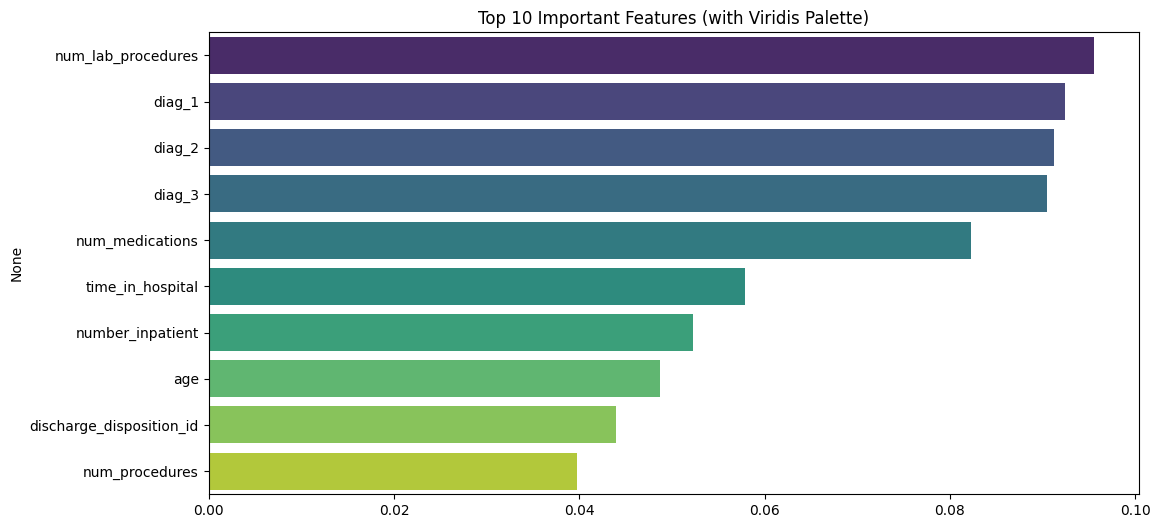

In [9]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Create a list of colors using a built-in palette
palette = sns.color_palette("viridis", n_colors=10)

# Plot with different colors for each bar
plt.figure(figsize=(12, 6))
sns.barplot(
    x=importances[indices][:10],
    y=features[indices][:10],
    palette=palette
)
plt.title('Top 10 Important Features (with Viridis Palette)')
plt.show()

9. Conclusion
This project demonstrated the potential of machine learning in medical diagnosis. Our Random Forest classifier performed reasonably well in identifying patients at high risk of readmission due to diabetes.

Future work may include:

* Trying different models (XGBoost, SVM)
* Hyperparameter tuning
* Handling class imbalance (SMOTE)
* Integrating time-based features or external health data

This workflow can be adapted for many engineering applications involving predictive modeling.

10. Model Training with XGBoost for Comparison

In [10]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the training labels, then transform the test labels
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train XGBoost model with the encoded labels
# The use_label_encoder parameter is no longer necessary
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train_encoded)

# Prediction and evaluation
y_pred_xgb_encoded = xgb.predict(X_test)
# Inverse transform predictions to get original labels for evaluation
y_pred_xgb = le.inverse_transform(y_pred_xgb_encoded)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8861157512036946

Confusion Matrix:
 [[17974    95]
 [ 2223    62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     18069
           1       0.39      0.03      0.05      2285

    accuracy                           0.89     20354
   macro avg       0.64      0.51      0.50     20354
weighted avg       0.83      0.89      0.84     20354



11. GridsearchCV Optimization for XGBoost Model

In [11]:
# GridSearchCV to optimize XGBoost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# scale_pos_weight hesapla
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0]
}


xgb_base = XGBClassifier(eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb_base, param_grid=param_grid,
                           scoring='f1', cv=3, verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)


best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred_best = best_xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8835609708165472
[[17877   192]
 [ 2178   107]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     18069
           1       0.36      0.05      0.08      2285

    accuracy                           0.88     20354
   macro avg       0.62      0.52      0.51     20354
weighted avg       0.83      0.88      0.84     20354



In [12]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])
print("XGBoost (tuned) AUC Score:", auc_score)

XGBoost (tuned) AUC Score: 0.6379704325735058


## 10. ROC Curve Comparison (RandomForest and XGBoost and XGBoost(tuned with GridSearchCV)

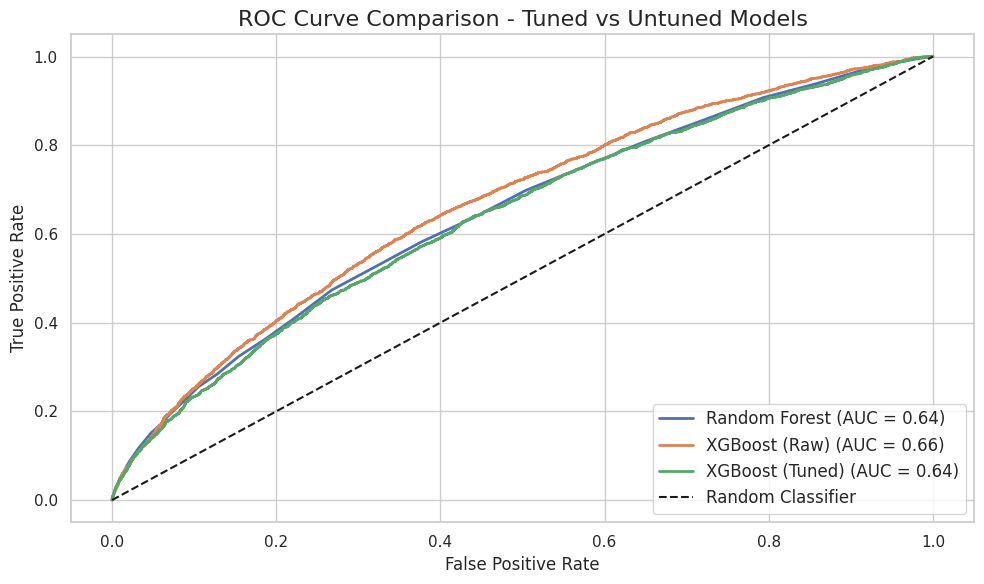

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# ROC
rf_probs = rf.predict_proba(X_test)[:, 1]
xgb_raw_probs = xgb.predict_proba(X_test)[:, 1]
xgb_tuned_probs = best_xgb.predict_proba(X_test)[:, 1]

# ROC curve and AUC
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_raw_fpr, xgb_raw_tpr, _ = roc_curve(y_test, xgb_raw_probs)
xgb_tuned_fpr, xgb_tuned_tpr, _ = roc_curve(y_test, xgb_tuned_probs)

# AUC scores
rf_auc = auc(rf_fpr, rf_tpr)
xgb_raw_auc = auc(xgb_raw_fpr, xgb_raw_tpr)
xgb_tuned_auc = auc(xgb_tuned_fpr, xgb_tuned_tpr)

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})', linewidth=2)
plt.plot(xgb_raw_fpr, xgb_raw_tpr, label=f'XGBoost (Raw) (AUC = {xgb_raw_auc:.2f})', linewidth=2)
plt.plot(xgb_tuned_fpr, xgb_tuned_tpr, label=f'XGBoost (Tuned) (AUC = {xgb_tuned_auc:.2f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.title('ROC Curve Comparison - Tuned vs Untuned Models', fontsize=16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
# This assumes your training features are in X_train
feature_names = list(X_train.columns)
print("Feature names:", feature_names)

Feature names: ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


In [15]:
# Get the first row as a dictionary
sample_row = X_test.iloc[0].to_dict()   # or X_train.iloc[0].to_dict()
print("Sample row:", sample_row)

# Optionally, get two rows as a list of dicts
sample_rows = X_test.iloc[:2].to_dict(orient="records")  # list of dictionaries
print("Sample rows:", sample_rows)


Sample row: {'race': 3, 'gender': 0, 'age': 7, 'admission_type_id': 1, 'discharge_disposition_id': 1, 'admission_source_id': 6, 'time_in_hospital': 11, 'num_lab_procedures': 68, 'num_procedures': 0, 'num_medications': 20, 'number_outpatient': 0, 'number_emergency': 0, 'number_inpatient': 0, 'diag_1': 121, 'diag_2': 397, 'diag_3': 128, 'number_diagnoses': 5, 'max_glu_serum': 3, 'A1Cresult': 3, 'metformin': 1, 'repaglinide': 1, 'nateglinide': 1, 'chlorpropamide': 1, 'glimepiride': 1, 'acetohexamide': 0, 'glipizide': 1, 'glyburide': 1, 'tolbutamide': 0, 'pioglitazone': 1, 'rosiglitazone': 1, 'acarbose': 1, 'miglitol': 1, 'troglitazone': 0, 'tolazamide': 0, 'examide': 0, 'citoglipton': 0, 'insulin': 2, 'glyburide-metformin': 1, 'glipizide-metformin': 0, 'glimepiride-pioglitazone': 0, 'metformin-rosiglitazone': 0, 'metformin-pioglitazone': 0, 'change': 1, 'diabetesMed': 1}
Sample rows: [{'race': 3, 'gender': 0, 'age': 7, 'admission_type_id': 1, 'discharge_disposition_id': 1, 'admission_sour

In [16]:
!pip install mlflow boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/20

In [17]:
import mlflow
print("MLflow version:", mlflow.__version__)


MLflow version: 3.8.1


In [20]:
import mlflow
import mlflow.sklearn
from mlflow.models import infer_signature

# Suppose you already have X_train, y_train, best_xgb
best_xgb.fit(X_train, y_train)

# Predict once to infer signature
y_pred = best_xgb.predict(X_train)

# Create signature object
signature = infer_signature(X_train, y_pred)

# Provide a small input example (1–2 rows)
input_example = X_train[:2]

mlflow.set_tracking_uri(os.environ["MLFLOW_TRACKING_URI"])
mlflow.set_experiment("diabetes_readmission")

with mlflow.start_run(run_name="xgb_colab_run"):
    # log parameters
    mlflow.log_params(best_xgb.get_params())

    # log metrics
    y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    mlflow.log_metric("val_auc", auc)

    # log model
    #mlflow.sklearn.log_model(best_xgb, name="best_xgb")
    #mlflow.sklearn.load_model()
    mlflow.sklearn.log_model(
        sk_model=best_xgb,
        name="best_xgb",     # or name="best_xgb" if using MLflow ≥3.x
        signature=signature,
        input_example=input_example
    )

    print("Run logged to MLflow with ID:", mlflow.active_run().info.run_id)

/usr/local/lib/python3.12/dist-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


Run logged to MLflow with ID: b00391470f764496a6cec4a218a35650
🏃 View run xgb_colab_run at: http://3.86.97.189:5000/#/experiments/757237629862424983/runs/b00391470f764496a6cec4a218a35650
🧪 View experiment at: http://3.86.97.189:5000/#/experiments/757237629862424983


In [21]:
import mlflow

print("Current tracking URI:", mlflow.get_tracking_uri())
print("Current experiment:", mlflow.get_experiment_by_name("diabetes_readmission"))


Current tracking URI: http://3.86.97.189:5000
Current experiment: <Experiment: artifact_location='s3://sentiment-classifier-data-z/757237629862424983', creation_time=1756940839843, experiment_id='757237629862424983', last_update_time=1756940839843, lifecycle_stage='active', name='diabetes_readmission', tags={'mlflow.experimentKind': 'custom_model_development',
 'mlflow.sharedViewState.3894e7dac091113a949e1a0b144bdfbf23f857b1cfb2b6251e919052fe25b155': 'deflate;eJxdUtFO4zAQ/JWTnysEr3kLpdwhWoRSqE6qTq1rb8lKjh1519Ac6r+zbgIpPO7szOx61u+KQEdT36JjiKpQaqJCtBCvu3vopNbMEXeJgS6IdeQNYwMjqSSjir12BBN16j/ldqHK+VxIDvdgOuPgy740jK9ZbzVrAqbPzvrfRDXBgltBJAx+VDj3q0qeREPgwDDYaXCpEaRYn6+3XYYUDWyFeI4usin9RG/68VslY6O4zw6t9hasKt6PPfKI3ud6PTD+oLXgx3qFhDt0yN1Ct6Osp+WhsvvtXbV82lxdbqrnh6Vs8IrwttAHbPB/th5yE9kciT8HDChSaYykLFlUcEr7TJIIfseQWrAr7RLQnZ/WEr5EwjFJv0YLs6bl7jv8kjXXclafnBvKH0/XiUMF+whUz7zeuYwPYhd22s3Rw8l0GvweX0SkDuUBqf8txNCe7u5h2YTAtQeS6Zfj7f5m8gLkEqaXqOPxA/ej5lc='}>


In [22]:
import mlflow
print("Tracking URI:", mlflow.get_tracking_uri())
exp = mlflow.get_experiment_by_name("diabetes_readmission")
print("Experiment:", exp)


Tracking URI: http://3.86.97.189:5000
Experiment: <Experiment: artifact_location='s3://sentiment-classifier-data-z/757237629862424983', creation_time=1756940839843, experiment_id='757237629862424983', last_update_time=1756940839843, lifecycle_stage='active', name='diabetes_readmission', tags={'mlflow.experimentKind': 'custom_model_development',
 'mlflow.sharedViewState.3894e7dac091113a949e1a0b144bdfbf23f857b1cfb2b6251e919052fe25b155': 'deflate;eJxdUtFO4zAQ/JWTnysEr3kLpdwhWoRSqE6qTq1rb8lKjh1519Ac6r+zbgIpPO7szOx61u+KQEdT36JjiKpQaqJCtBCvu3vopNbMEXeJgS6IdeQNYwMjqSSjir12BBN16j/ldqHK+VxIDvdgOuPgy740jK9ZbzVrAqbPzvrfRDXBgltBJAx+VDj3q0qeREPgwDDYaXCpEaRYn6+3XYYUDWyFeI4usin9RG/68VslY6O4zw6t9hasKt6PPfKI3ud6PTD+oLXgx3qFhDt0yN1Ct6Osp+WhsvvtXbV82lxdbqrnh6Vs8IrwttAHbPB/th5yE9kciT8HDChSaYykLFlUcEr7TJIIfseQWrAr7RLQnZ/WEr5EwjFJv0YLs6bl7jv8kjXXclafnBvKH0/XiUMF+whUz7zeuYwPYhd22s3Rw8l0GvweX0SkDuUBqf8txNCe7u5h2YTAtQeS6Zfj7f5m8gLkEqaXqOPxA/ej5lc='}>


In [23]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# def load_diabetes(split=True):
#     #df = pd.read_csv("diabetic_data.csv")  # path to Kaggle dataset
#     df = pd.read_csv("/content/drive/MyDrive/dataset/diabetic_data.csv")
#     # target: 1 if readmitted <30, else 0
#     df['readmit_30'] = (df['readmitted'] == '<30').astype(int)

#     # drop leakage columns
#     df = df.drop(columns=['encounter_id', 'patient_nbr'])

#     # numeric + categorical split
#     num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
#     cat_cols = df.select_dtypes(include=['object']).columns.tolist()
#     cat_cols.remove('readmitted')  # drop raw label column

#     X = df[num_cols + cat_cols]
#     y = df['readmit_30']

#     if split:
#         return train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#     else:
#         return X, y, num_cols, cat_cols

In [24]:
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# def build_preprocess(num_cols, cat_cols):
#     numeric_transformer = Pipeline(steps=[
#         ("scaler", StandardScaler())
#     ])
#     categorical_transformer = Pipeline(steps=[
#         ("onehot", OneHotEncoder(handle_unknown="ignore"))
#     ])
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ("num", numeric_transformer, num_cols),
#             ("cat", categorical_transformer, cat_cols)
#         ]
#     )
#     return preprocessor

In [25]:
# import mlflow, mlflow.sklearn
# from mlflow.models import infer_signature
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score

# X, y, num_cols, cat_cols = load_diabetes(split=False)  # implement loader
# X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
# pre = build_preprocess(num_cols, cat_cols)
# X_tr_p = pre.fit_transform(X_tr)
# X_te_p = pre.transform(X_te)

# with mlflow.start_run(run_name='xgb_baseline'):
#     model = XGBClassifier(n_estimators=200, tree_method='hist')
#     model.fit(X_tr_p, y_tr)
#     proba = model.predict_proba(X_te_p)[:,1]
#     auc = roc_auc_score(y_te, proba)
#     mlflow.log_metric('val_auc', auc)
#     mlflow.log_params(model.get_params())

#     # infer signature and include input example
#     signature = infer_signature(X_tr_p, model.predict(X_tr_p))
#     input_example = X_tr_p[:2]

#     mlflow.sklearn.log_model(
#         sk_model=model,
#         name='model',  # or name='model' if MLflow >=3.x
#         signature=signature,
#         input_example=input_example
#     )



In [26]:
import sklearn
import xgboost as xgb

print("Scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgb.__version__)

Scikit-learn version: 1.6.1
XGBoost version: 3.1.2


In [27]:
# inside the same MLflow run or after it (if you have run_id)
artifact_uri = mlflow.get_artifact_uri("best_xgb")
print("artifact uri:", artifact_uri)
# Example prints: s3://my-mlflow-bucket/...
# or create a runs: URI:
run_id = mlflow.active_run().info.run_id
model_run_uri = f"runs:/{run_id}/best_xgb"
print("runs URI:", model_run_uri)


2026/01/20 20:50:05 WARNING mlflow.tracking.fluent: No active run found. A new active run will be created. If this is not intended, please create a run using `mlflow.start_run()` first.


artifact uri: s3://sentiment-classifier-data-z/757237629862424983/0d797a8956f84e3e8ccf05bf378cb0d9/artifacts/best_xgb
runs URI: runs:/0d797a8956f84e3e8ccf05bf378cb0d9/best_xgb
